In [2]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x = torch.linspace(0,799,800)

In [8]:
y = torch.sin(x*2*3.1416/40)

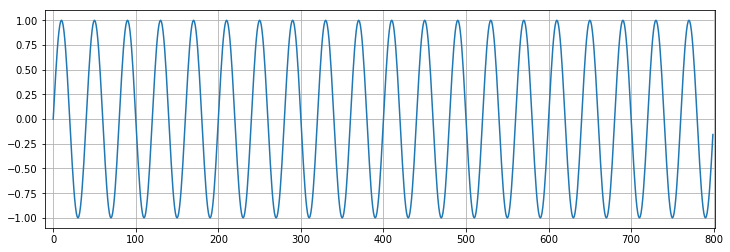

In [11]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

In [13]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

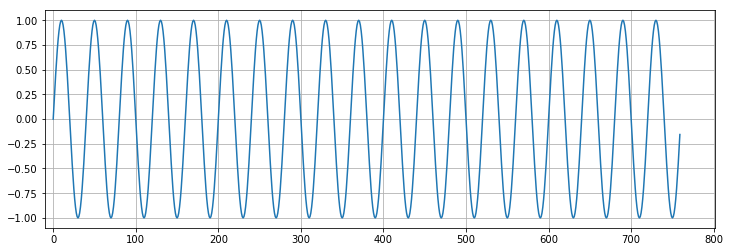

In [15]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

In [17]:
def input_data(seq,ws): #ws: window size
    out = [] #([0,1,2,3],[4]) , ([1,2,3,4],[5]) ....
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
        
        
    return out

In [25]:
window_size = 40

train_data = input_data(train_set,window_size)

In [26]:
len(train_data)

720

0-799 --> 800
 800-40 --> 760
 760-40 --> 720

In [29]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [31]:
train_data[1]

(tensor([ 1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,  7.0711e-01,
          8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,  1.0000e+00,
          9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,  7.0710e-01,
          5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01, -7.2400e-06,
         -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01, -7.0711e-01,
         -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01, -1.0000e+00,
         -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01, -7.0710e-01,
         -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01,  1.4480e-05]),
 tensor([0.1564]))

In [34]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1,hidden_size = 50, out_size=1):
                 
                 super().__init__()
                 self.hidden_size = hidden_size
                 
                 self.lstm = nn.LSTM(input_size,hidden_size)
                 
                 self.linear = nn.Linear(hidden_size,out_size)
                 
                 self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
                 
                 
    def forward(self,seq):
                 
                 lstm_out , self.hidden = self.lstm(seq.view(len(seq),1,-1),self.hidden)
                 
                 pred = self.linear(lstm_out.view(len(seq),-1))
                 
                 # [1,2,3] [4] --> [1,2,3,4 --> 4]
                 
                 return pred[-1]

In [36]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

In [38]:
model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [46]:
for p in model.parameters():
    print(p.numel())

200
10000
200
200
50
1


In [47]:
train_set[-window_size:].tolist()

[0.0002596856211312115,
 0.15669289231300354,
 0.30926769971847534,
 0.45422032475471497,
 0.5879955291748047,
 0.7072919607162476,
 0.8091720938682556,
 0.8911271691322327,
 0.9511368870735168,
 0.9877293109893799,
 0.9999999403953552,
 0.9876466989517212,
 0.950973629951477,
 0.8908873796463013,
 0.8088615536689758,
 0.7069184184074402,
 0.5875681638717651,
 0.4537496268749237,
 0.3087652921676636,
 0.15617111325263977,
 -0.0002685945073608309,
 -0.1567016988992691,
 -0.30927619338035583,
 -0.4542282819747925,
 -0.5880027413368225,
 -0.7072982788085938,
 -0.8091772794723511,
 -0.8911312222480774,
 -0.9511396288871765,
 -0.9877306818962097,
 -0.9999999403953552,
 -0.9876452684402466,
 -0.9509708881378174,
 -0.8908833265304565,
 -0.8088563084602356,
 -0.706912100315094,
 -0.5875609517097473,
 -0.4537416994571686,
 -0.3087567985057831,
 -0.1561623215675354]

Epoch:  1 Loss: 0.00006612
Loss on test predictions: 0.0026831391733139753


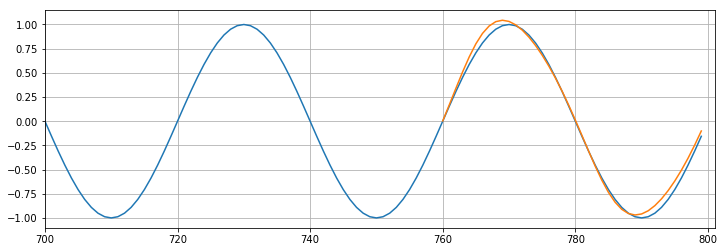

Epoch:  2 Loss: 0.00006301
Loss on test predictions: 0.002604913432151079


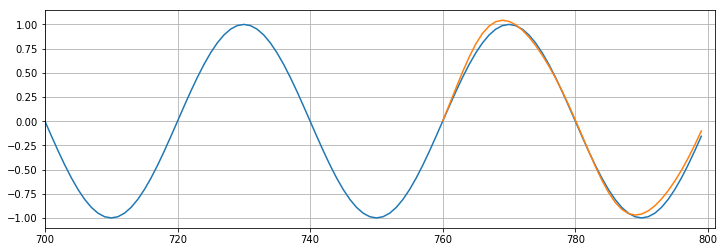

Epoch:  3 Loss: 0.00006010
Loss on test predictions: 0.0025333359371870756


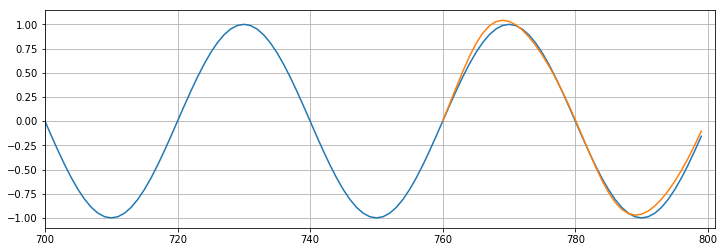

Epoch:  4 Loss: 0.00005737
Loss on test predictions: 0.0024675868917256594


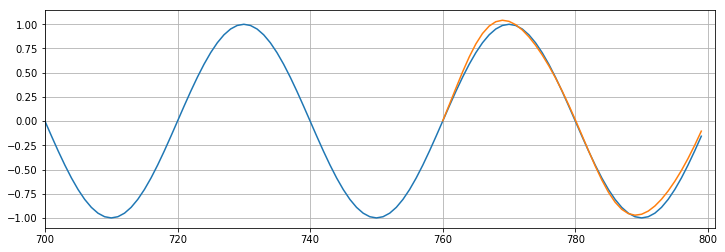

Epoch:  5 Loss: 0.00005481
Loss on test predictions: 0.002406907267868519


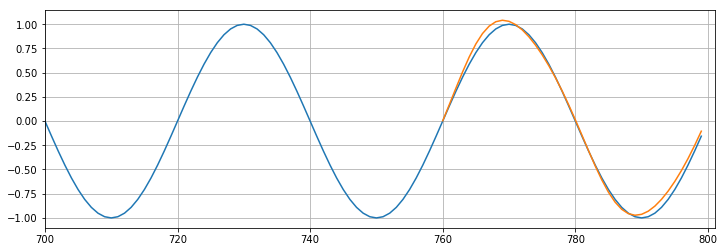

Epoch:  6 Loss: 0.00005242
Loss on test predictions: 0.0023507867008447647


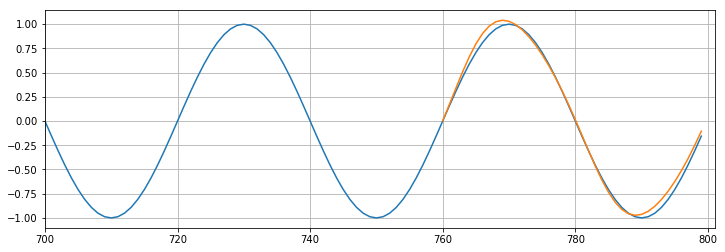

Epoch:  7 Loss: 0.00005017
Loss on test predictions: 0.002298622624948621


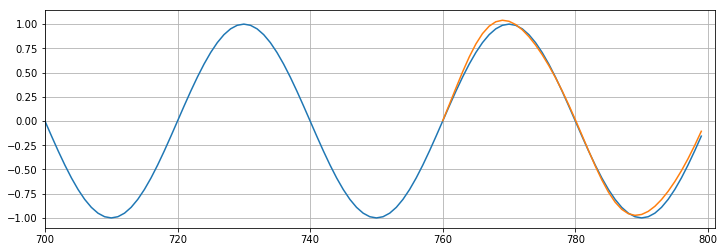

Epoch:  8 Loss: 0.00004807
Loss on test predictions: 0.0022500765044242144


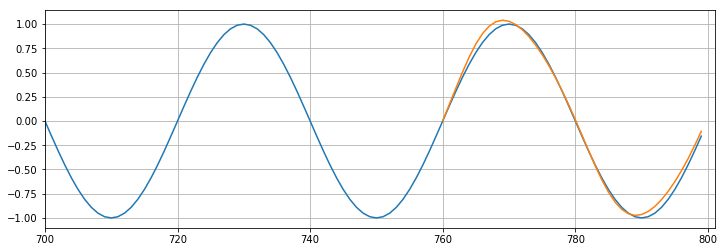

Epoch:  9 Loss: 0.00004609
Loss on test predictions: 0.002204688498750329


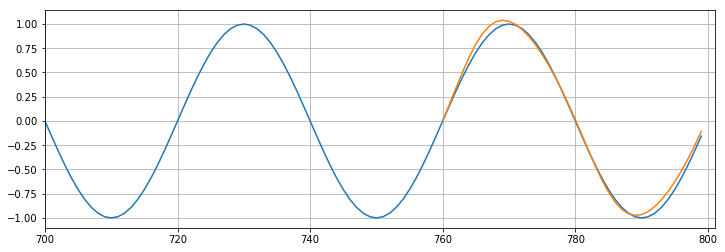

Epoch: 10 Loss: 0.00004423
Loss on test predictions: 0.002162101911380887


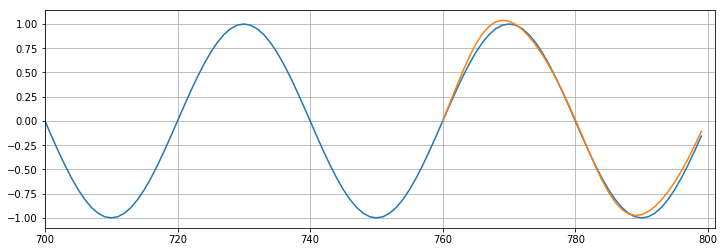

In [52]:
epochs = 10
future = 40

for i in range(epochs):
    
    # tuple-unpack the train_data set
    for seq, y_train in train_data:
        
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
    # MAKE PREDICTIONS
    # start with a list of the last 10 training records
    preds = train_set[-window_size:].tolist()

    for f in range(future):  
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                            torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
            
    loss = criterion(torch.tensor(preds[-window_size:]),y[760:])
    print(f'Loss on test predictions: {loss}')

    # Plot from point 700 to the end
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy())
    plt.plot(range(760,800),preds[window_size:])
    plt.show()

# Train the model
We'll continue to train our model, this time using the entire dataset. Then we'll predict what the 40 points should be.

In [55]:
epochs = 10
window_size = 40
future = 40

# Create the full set of sequence/label tuples:
all_data = input_data(y,window_size)
len(all_data)  # this should equal 800-40

760

In [56]:
import time
start_time = time.time()

for i in range(epochs):
    
    # tuple-unpack the entire set of data
    for seq, y_train in all_data:  
       
        # reset the parameters and hidden states
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        
        loss.backward()
        optimizer.step()
        
    # print training result
    print(f'Epoch: {i+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00004238
Epoch:  2 Loss: 0.00004065
Epoch:  3 Loss: 0.00003903
Epoch:  4 Loss: 0.00003751
Epoch:  5 Loss: 0.00003607
Epoch:  6 Loss: 0.00003472
Epoch:  7 Loss: 0.00003345
Epoch:  8 Loss: 0.00003224
Epoch:  9 Loss: 0.00003110
Epoch: 10 Loss: 0.00003002

Duration: 154 seconds


# Predict future values, plot the result

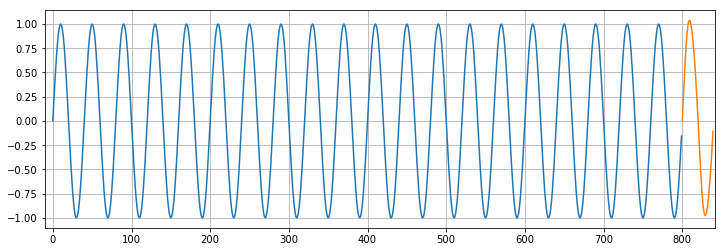

In [54]:
preds = y[-window_size:].tolist()

for i in range(future):  
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        # Reset the hidden parameters
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))  
        preds.append(model(seq).item())

plt.figure(figsize=(12,4))
plt.xlim(-10,841)
plt.grid(True)
plt.plot(y.numpy())
plt.plot(range(800,800+future),preds[window_size:])
plt.show()